In [12]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Проведем оценку данных на предмет необходимости предобработка

In [14]:
df.drop(columns=["Serial No."])
df.shape

(500, 9)

9 колонок, а значит missingno использовать можно

<AxesSubplot:>

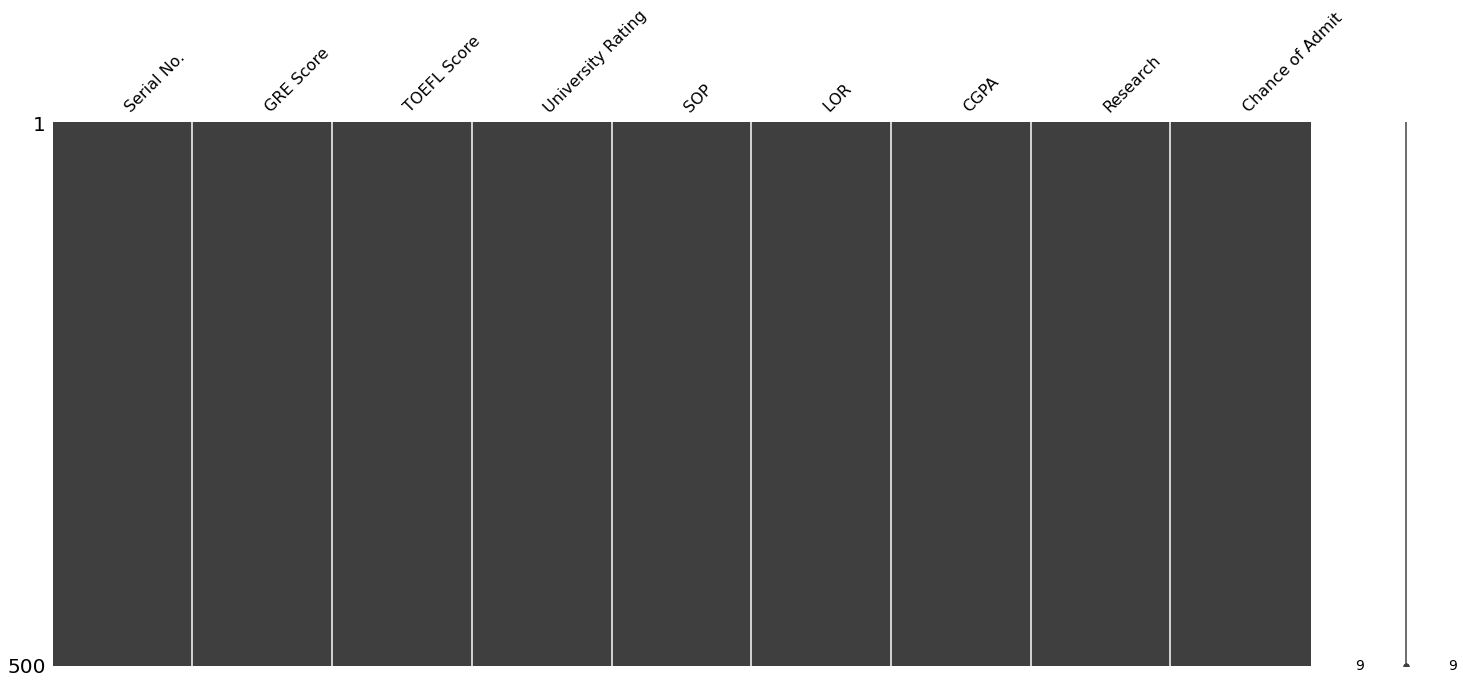

In [15]:
msno.matrix(df)

В столбцах пропусков нет

## 1. GRE и CGPA лучше других показателей определяют шансы на поступление

Посмотрим, как взаимосвязаны все показатели с шансом на поступление

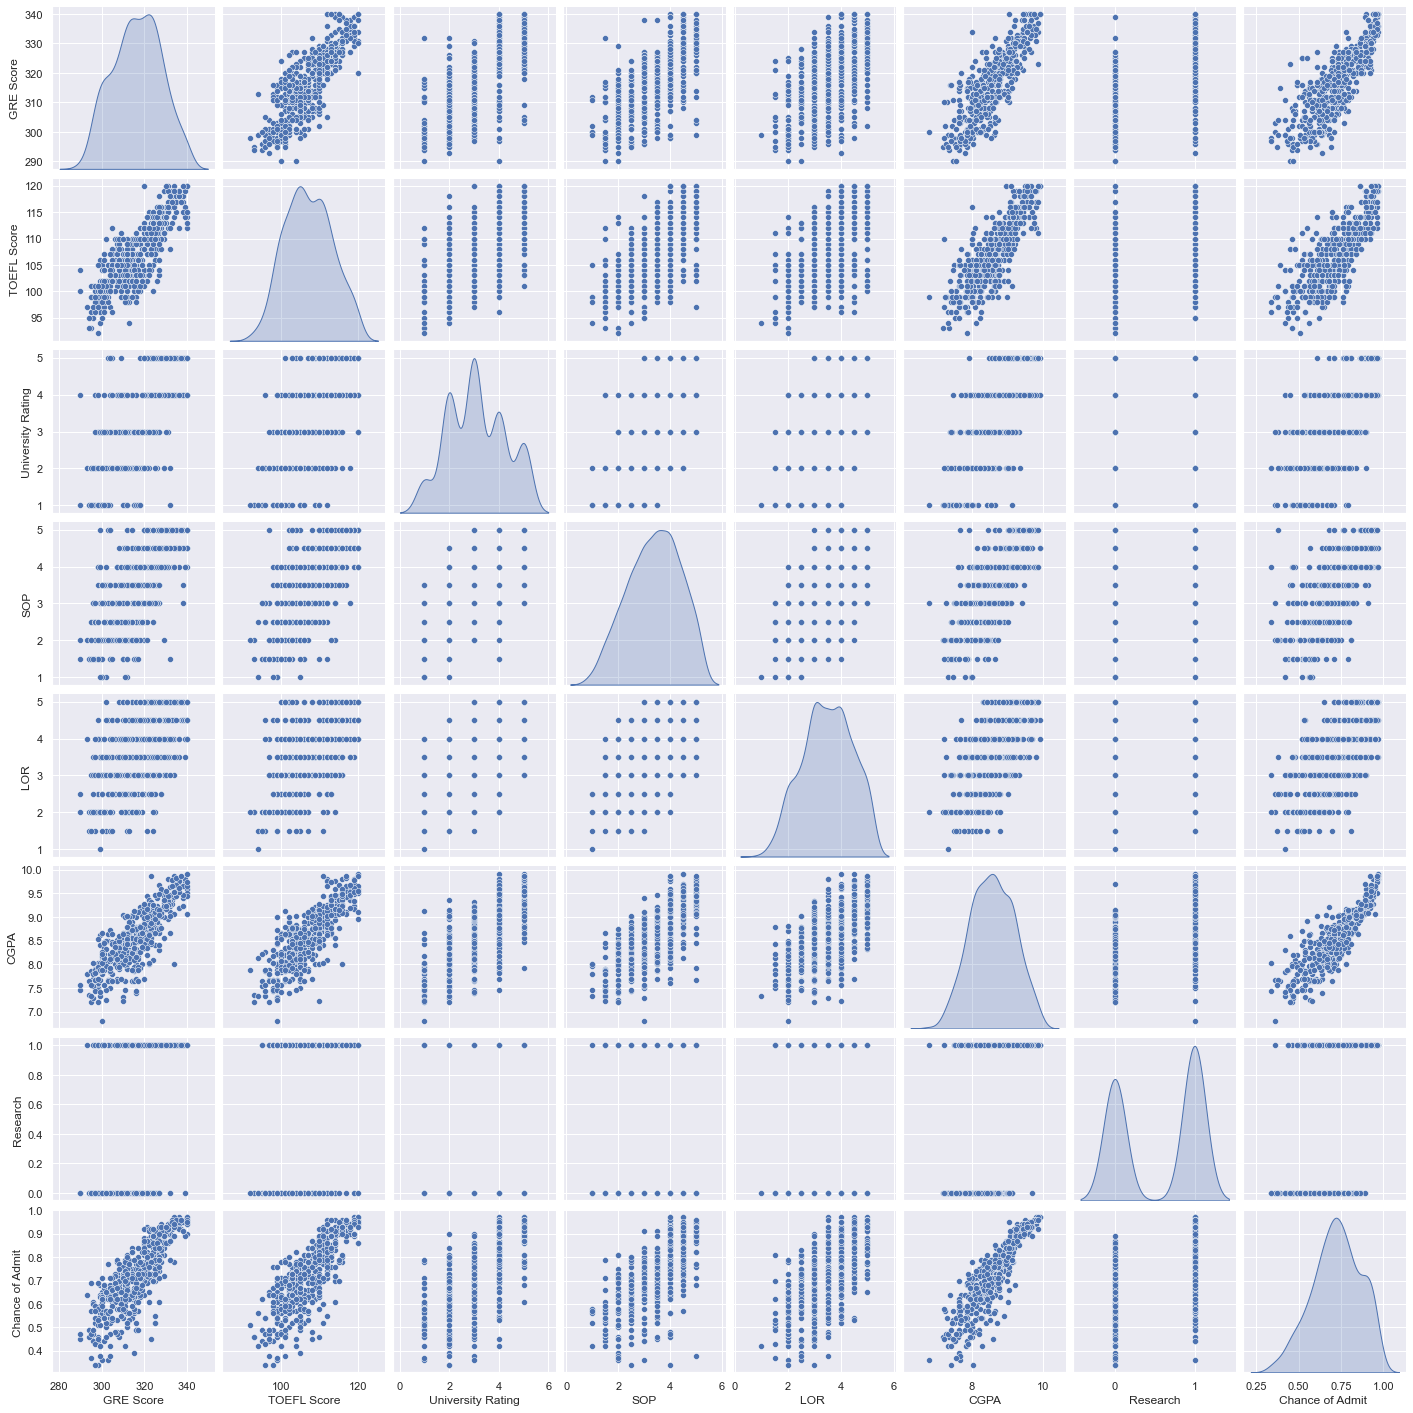

In [67]:
grad_num=df[[ 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']]

sns.pairplot(grad_num, diag_kind='kde')
plt.show()

#### Между 'GRE Score', 'TOEFL Score', 'CGPA' & 'Chance of Admit ' есть линейная связь, значит, чем больше баллы за каждый из этих критериев, тем выше шанс на поступление в университет, поэтому предположительно,  'Chance of Admit'

## 2. Опыт в исследовательской деятельности важен для поступления

Сначала посмотрим каково распределения абитуриентов с опытом в исследованиях и без по каждому университету

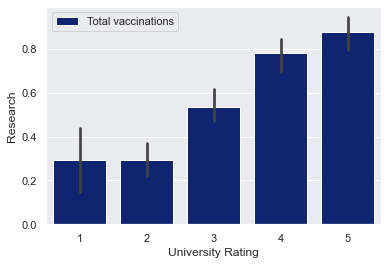

In [46]:
sns.set_theme(style="darkgrid")
plt.plot()
sns.set_color_codes("dark")
sns.barplot(x="University Rating", y="Research", data=df, label="Total vaccinations", color="b");
plt.legend(ncol=1);

#### По графику видно, что университет, у которого процент абитуриентов с исследовательским опытом наибольший, занимает пятую позицию в рейтинге, а в университет на первой позиции большинство абитуриентов идут без опыта. Это может быть связано с отличающимися требованиями для поступления, направленностью учреждения (технический, гуманитарный и т.д), а со также степенью образования (чаще при поступлении в магистратуру смотрят на опыт в исследованиях). 

Посмотрим, какой процент людей с высокими шансами (больше 80%) на попадание в каждый из университетов имели опыть в исследованиях 

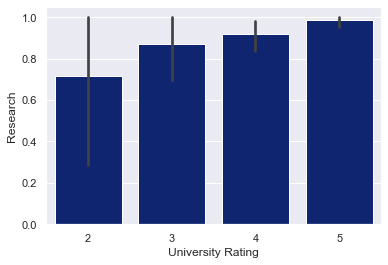

In [62]:
res = df[df['Chance of Admit '] >= 0.8]
sns.barplot(x="University Rating", y="Research", data=res, label="Total vaccinations", color="b");

#### По графику можно сказать, что чем ниже позиция университета тем больше процент людей с исследовательским опытом. Абитуриенты с высокими шансами, поступающие в университет на первой позиции, не имеют опыта совсем. Из графиков выше можно сделать вывод, что важность 'Research' розниться для каждого университета.

## 3. Оценка за заявление о намерениях (SOP) мало влияет на поступление

Посмотрим, какая зависимость между SOP и Chance of Admit

c:\users\redic\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


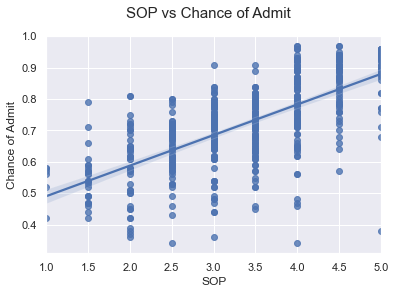

In [66]:
fig = plt.figure()
sns.regplot(df['SOP'], df['Chance of Admit '])
fig.suptitle('SOP vs Chance of Admit', fontsize = 15)              # Plot heading 
plt.xlabel('SOP', fontsize = 12)                          # X-label
plt.ylabel('Chance of Admit', fontsize = 12) 
plt.show()

#### По графику можно сказать, что связь между двумя показателями больше случайная чем линейная. Абитуриент с низкой оценкой за SOP может иметь большие шансы на поступление и наоборот, поэтому критерий SOP мало влияет на шансы поступления.

## 4. Оценка за SOP и LOR меньше всего связаны с другими показателями абитуриентов

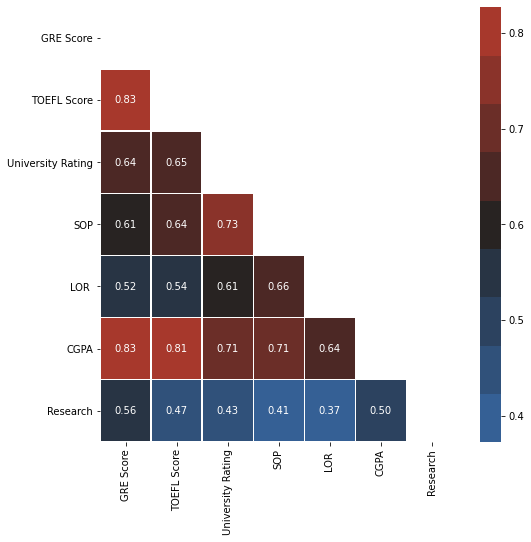

In [9]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="dark")
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

#### 'Research' меньше всего коррелирует с другими показателями.

## 5. Знание англиского языка - один из самых важных показателей при приеме в университет

Построим график линейной зависимости между TOEFL Score и Chance of Admit

c:\users\redic\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


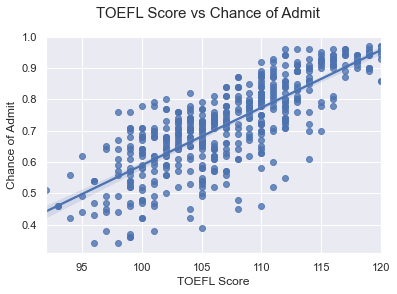

In [53]:
fig = plt.figure()
sns.regplot(df['TOEFL Score'], df['Chance of Admit '])
fig.suptitle('TOEFL Score vs Chance of Admit', fontsize = 15)              # Plot heading 
plt.xlabel('TOEFL Score', fontsize = 12)                          # X-label
plt.ylabel('Chance of Admit', fontsize = 12) 
plt.show()

#### Данный график и график из пункта №1 показывает, что результат за экзамен TOEFL находится в линейной зависимости с Chance of Admit наряду с некоторыми другими показателями (GRE, CGMAT), поэтому его можно считать одним из самых важных критериев, определяющие шансы на поступление.

Также посмотрим, какой процент людей с высокими шансами на попадание в университет имеют хороший балл за экзамен

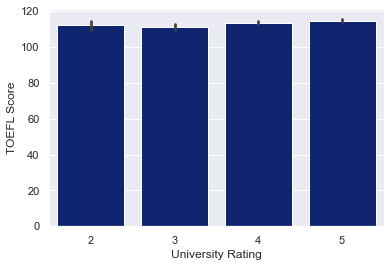

In [59]:
sns.barplot(x="University Rating", y="TOEFL Score", data=res, label="Total vaccinations", color="b");

#### Мы видим, что у всех абитуриентов с наибольшим Chance of Admit хорошие результаты за экзамен TOEFL

И график по всем абитуриентам

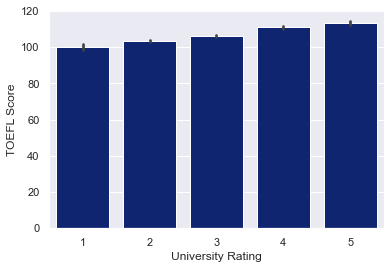

In [61]:
sns.barplot(x="University Rating", y="TOEFL Score", data=df, label="Total vaccinations", color="b");

По графику видно, что разница в баллах по университетам не слишком велика, а значит значимость знания английского при поступлении для каждого университета примерно одинаковая.